In [1]:
import os, sys

sys.path.append(os.path.abspath(os.path.join("../src")))

In [2]:
from datasets.bdd100k_datamodule import BDD100KDataModule

dataset = BDD100KDataModule("../datasets/bdd100k/", "100k", 1, 2, 10, False)

In [3]:
dataset.setup()

Loading val labels: 100%|██████████| 10000/10000 [00:00<00:00, 76713.10it/s]


In [4]:
train_loader = dataset.train_dataloader()

In [5]:
loader = iter(train_loader)

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


def plot(img, label):
    boxes = label["boxes"]
    labels = label["labels"]

    img = np.array(img)

    # unnormalize with mean and std
    img = (
        img * np.array([0.229, 0.224, 0.225])[:, None, None]
        + np.array([0.485, 0.456, 0.406])[:, None, None]
    )
    img = np.clip(img, 0, 1)
    img = np.transpose(img, (1, 2, 0))

    plt.imshow(img)

    for i in range(len(boxes)):
        box = boxes[i]
        label = labels[i]
        plt.gca().add_patch(
            plt.Rectangle(
                (box[0] - box[2] / 2, box[1] - box[3] / 2),
                box[2],
                box[3],
                fill=False,
                edgecolor="r",
                linewidth=2,
            )
        )

    plt.show()

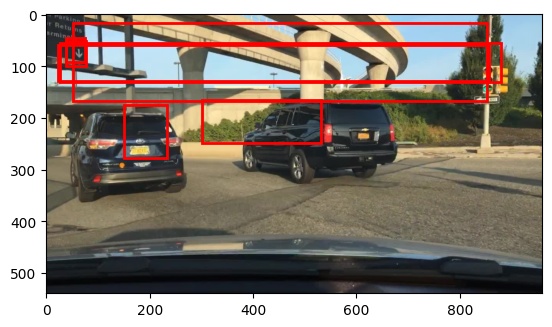

In [7]:
batch = next(loader)
plot(batch[0].tensors[0], batch[1][0])